# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Maphuti Lehutjo,Velaphi Calvin Mngomezulu,Maphuti Rose Ntsewa,Nolokazi Masetlwa,Sinethema Mthethwa**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [93]:
# Libraries for data loading, data manipulation and data visulisation
#!pip install xgboost
%matplotlib inline
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import matplotlib.dates as dates

#import libraries for modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, matthews_corrcoef, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import *
from sklearn.linear_model import *


# Suppress annoying future warnings in Python 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df_train = pd.read_csv('./df_train.csv', parse_dates=['time'],infer_datetime_format=True)
df_test = pd.read_csv('./df_test.csv', parse_dates=['time'],infer_datetime_format=True)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
pd.set_option('display.max_columns', None) #we want to see all columns displayed
pd.set_option('display.max_rows', None)
df_train.head() #Looking at the top five rows of our data we can see all our features as well as the types of data we are working with

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


We have weather data for five cities of Spain: **Madrid, Valencia, Seville, Bilbao, Barcelona**

The weather categories in the dataset include:
<br> - **wind_speed** and **wind_degree** Valencia wind degree is categorical 1-10 and other cities are between 1-360 degrees
<br> - **rain_1h** and **rain_3h**
<br> - **humidity**
<br> - **clouds_all**
<br> - **pressure**
<br> - **snow_3h**
<br> - **weather_id**: A metric used to explain the weather condition of a specific city at a specified time
<br> - **temp_max** and **temp**

Our target variable is **load_shortfall_3h**: The difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows

####  Distribution of the predicted variable  

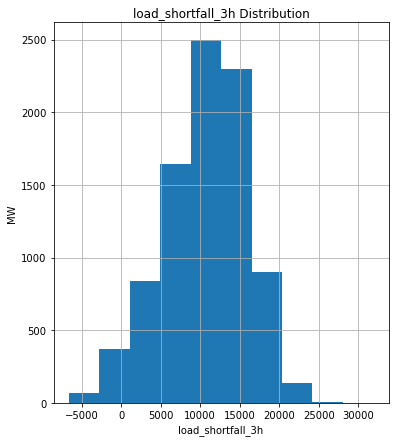

In [4]:
#Graph showing the discribution load_shortfall_3h
plt.title('load_shortfall_3h Distribution')
df_train['load_shortfall_3h'].hist(figsize=(6,7))
plt.xlabel('load_shortfall_3h')
plt.ylabel('MW')
plt.show();

The distribution is fairly normal as we can see

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

#### Findings in the df.info() - Datatypes

All of the variables are numeric (float64) except for 
<br> 1) **Time** - imported in datetime64[ns] fromat from CSV
<br> 2) **Valencia_wind_deg and Seville_pressure**, which are objects (categorical data).

#### Missing Data
This command also shows us that out of the 8763 rows in our data set per feature only one of the features contain null values (missing data): Valencia_pressure.

#### Note on Index 
We also didn't set the index to time in the beginning so there is one initial column called "Unnamed: 0" which is identical to the row numbers and we'll drop later 

### 3.1  Look at data statistics

In [6]:
# looking at data statistics

df_train['load_shortfall_3h'].describe()

count     8763.000000
mean     10673.857612
std       5218.046404
min      -6618.000000
25%       7390.333333
50%      11114.666667
75%      14498.166667
max      31904.000000
Name: load_shortfall_3h, dtype: float64

The load_shortfall_3h column has data between -6618.000000 and 31904.000000
the mean 10673.857612 and the median 11114.666667 is quite close together
standard deviation is 5218.046404

### 3.2 Plot feature interactions

#### We have a look at the temperatures so see if there might be some seasonality in the data. 

Text(0, 0.5, 'Temp Kelvin')

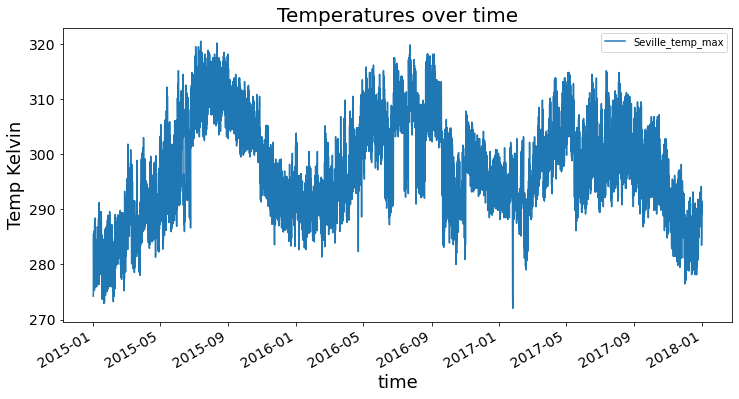

In [7]:
df_train.plot(x='time',y='Seville_temp_max',fontsize = 14, figsize =(12,6))
plt.title('Temperatures over time',fontsize=20)
plt.xlabel('time', fontsize=18)
plt.ylabel('Temp Kelvin', fontsize=18)


#### We can see that the temperatures gets warmer and cooler seasonally, with winters and summers, which is what we expect

This tells us that we might need to feautre engineer some variables out of **time** later on. Perhaps Hours and days and weeks? 

Text(0, 0.5, 'Temperature Kelvin')

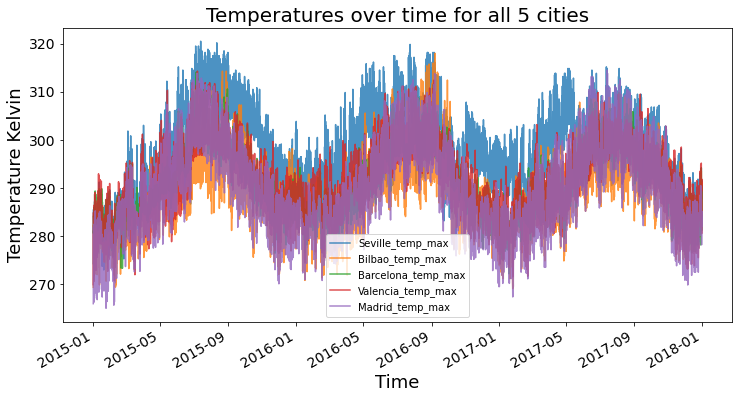

In [8]:
df_train.plot(x='time',y=['Seville_temp_max','Bilbao_temp_max','Barcelona_temp_max','Valencia_temp_max','Madrid_temp_max'],fontsize = 14,
              ylabel = 'Temp Kelvin', figsize =(12,6),alpha=0.8)
plt.title("Temperatures over time for all 5 cities",fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Temperature Kelvin', fontsize=18)

 Same as before, we see a seasonality accross all the temperatures looking at all the cities together

#### We look at the windspeed over time also, 5 cities at a time

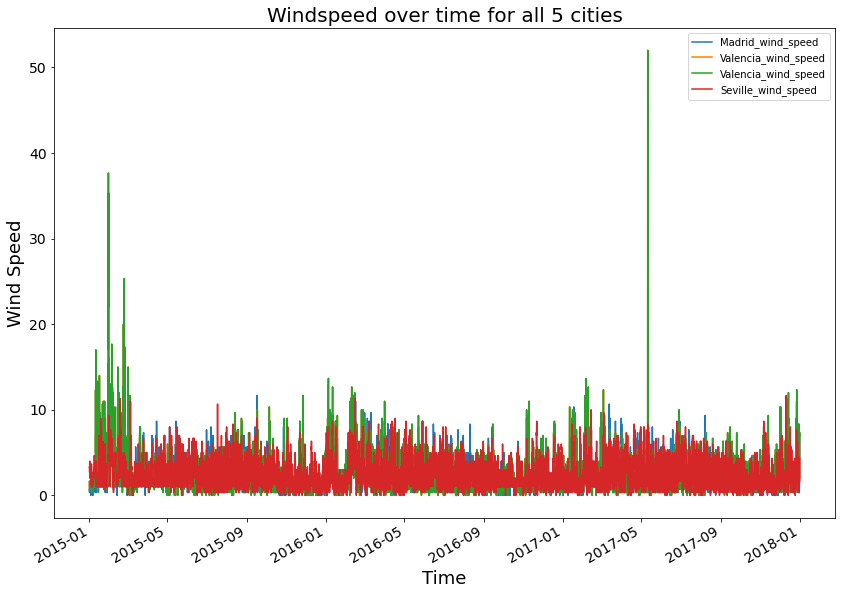

In [9]:
df_train.plot(x='time',y=['Madrid_wind_speed','Valencia_wind_speed','Valencia_wind_speed','Seville_wind_speed'],fontsize = 14,
              ylabel = 'Temp Kelvin', figsize =(14,10))
plt.title("Windspeed over time for all 5 cities",fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wind Speed', fontsize=18)
pyplot.show()

We don't really detect a trend here like we did with the temperatures. Lets now look at somehting different, the load shortfall 3hr when there is a certain windspeed in Barcelona 

<AxesSubplot:title={'center':'Load shortfall when there is a certain wind speed in Barcelona'}, xlabel='Barcelona_wind_speed', ylabel='load_shortfall_3h'>

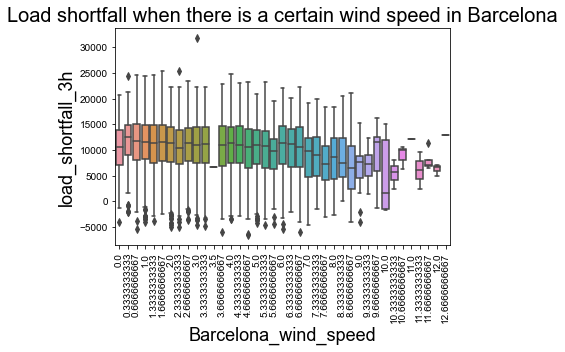

In [10]:
plt.xticks(rotation=90)
plt.title("Load shortfall when there is a certain wind speed in Barcelona",fontsize=20)
plt.xlabel('Barcelona_wind_speed', fontsize=18)
plt.ylabel('Wind Speed', fontsize=18)
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(x="Barcelona_wind_speed", y="load_shortfall_3h", data=df_train)

The load shortfall interrestingly tapers off as the windspeeds increase. I.e there is less load shortfall are above 10  

### 3.3 Evaluate correlation

### Feature Engineering - Time
We have seen in the EDA that there is seasonality in the data and hence we extract some time features out of the time column. We create feutures from time such as day and month and week. We suspect this might improve our model accuracy / prediction outcomes.

In [11]:
#get year,month,week,days,hours from time column and convert them to int
df_train['year'] = pd.DatetimeIndex(df_train['time']).year
df_train['month'] = pd.DatetimeIndex(df_train['time']).month
df_train['week'] = pd.DatetimeIndex(df_train['time']).week
df_train['weekdays'] = pd.DatetimeIndex(df_train['time']).weekday
df_train['hour'] = pd.DatetimeIndex(df_train['time']).hour

#change the datatype to float, useful for regression
df_train['year']= df_train['year'].astype('int')
df_train['month']= df_train['month'].astype('int')
df_train['week']= df_train['week'].astype('float')
df_train['weekdays']= df_train['weekdays'].astype('int')
df_train['hour']= df_train['hour'].astype('int')

df_train[['year','month','week','weekdays','hour']].head()

,year,month,week,weekdays,hour
0,2015,1,1.0,3,3
1,2015,1,1.0,3,6
2,2015,1,1.0,3,9
3,2015,1,1.0,3,12
4,2015,1,1.0,3,15


The features added on are year, month, week, weekdays and hour. 

In [12]:
# We look at the size of the df and see that by adding these features the dataset is now bigger by 8 columns
df_train.shape

(8763, 54)

We immediately take a look to see if the new features are correlated to the depentdent variableload_shortfall_3h

In [13]:
# #corelation between time and load_shortfall
Time = df_train[['year','month','week','weekdays','hour','time','load_shortfall_3h']].corr()
Time

,year,month,week,weekdays,hour,load_shortfall_3h
year,1.000000,-0.001039,-0.012764,1.677021e-03,2.748198e-04,0.131324
month,-0.001039,1.000000,0.975848,1.458431e-04,3.013643e-04,0.199048
week,-0.012764,0.975848,1.000000,-4.752887e-03,3.170587e-04,0.201080
weekdays,0.001677,0.000146,-0.004753,1.000000e+00,6.141191e-07,-0.156510
hour,0.000275,0.000301,0.000317,6.141191e-07,1.000000e+00,0.139285
load_shortfall_3h,0.131324,0.199048,0.201080,-1.565103e-01,1.392854e-01,1.000000


#### Time features
Weekdays are the most correlated with a -0.63 correlation. Next we use a heatmap to visualise the correlation 

<AxesSubplot:title={'center':'Heatmap of Time Features v/s load_shortfall_3hs'}>

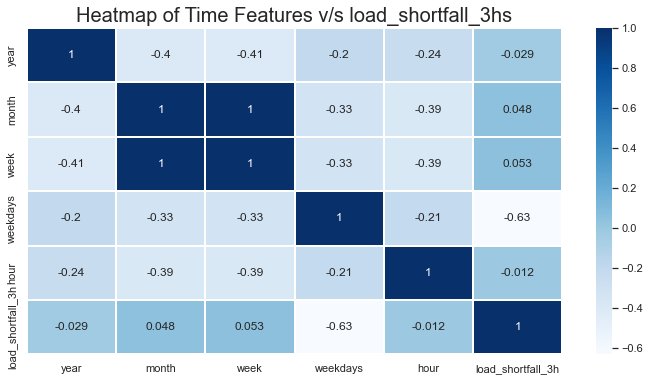

In [14]:
plt.title('Heatmap of Time Features v/s load_shortfall_3hs', fontsize = 20)
sns.heatmap(Time.corr(),linewidths=.4, annot= True, cmap=plt.cm.Blues)

We can now more clearly see that weekdays and load_shortfall_3h are somewhat strongly correlated.

#### Windspeed
We look at Windspeed for the different cities next to see if there is a correlation with load shortfall. We visually saw earlier in our exploration that the higher the windspeed, the lower the load shortfall. So we expect a correlation between the two. 

<AxesSubplot:title={'center':'Heatmap of Windspeed per City v/s load_shortfall_3hs'}>

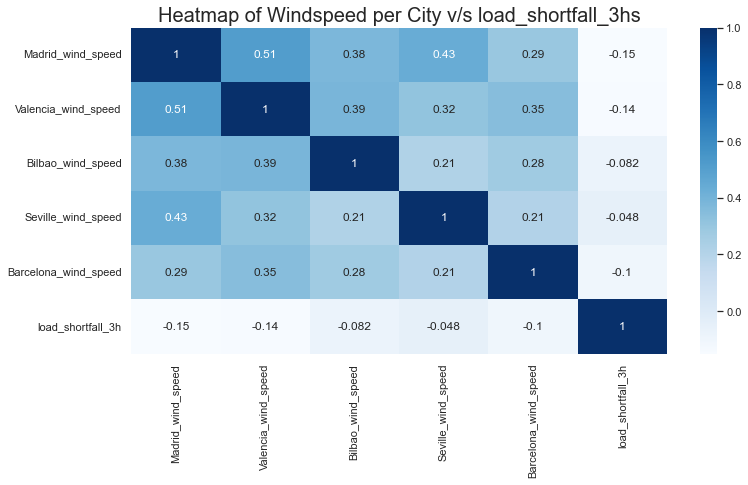

In [15]:
plt.title('Heatmap of Windspeed per City v/s load_shortfall_3hs', fontsize = 20)
wind_speed = df_train[['Madrid_wind_speed','Valencia_wind_speed','Bilbao_wind_speed','Seville_wind_speed','Barcelona_wind_speed',
                       'load_shortfall_3h']]
sns.heatmap(wind_speed.corr(), annot= True, cmap=plt.cm.Blues)

The correlation are unfortunately very weak, Not what we expected.

#### Temperatures 

Lets look at the correlation between maximum temperatures and load shortfall

<AxesSubplot:title={'center':'Heatmap of Temperature per City v/s load_shortfall_3hs'}>

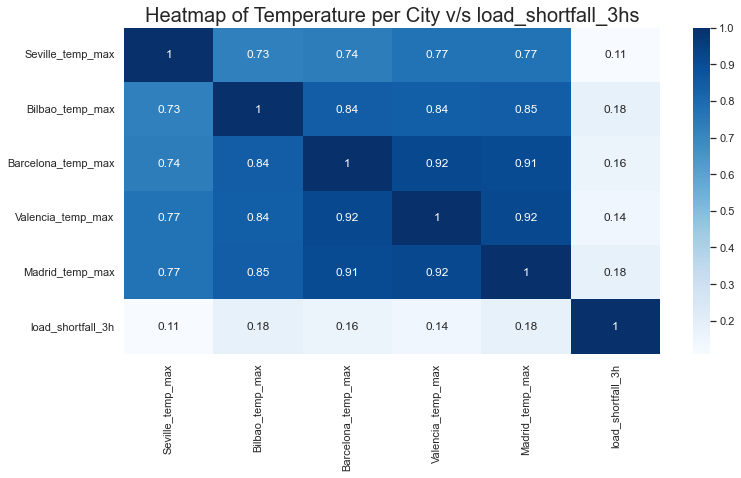

In [16]:
plt.title('Heatmap of Temperature per City v/s load_shortfall_3hs', fontsize = 20)
temp_max = df_train[['Seville_temp_max','Bilbao_temp_max','Barcelona_temp_max','Valencia_temp_max','Madrid_temp_max','load_shortfall_3h']]
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(temp_max.corr(), annot = True, cmap=plt.cm.Blues )

Weak correlations between max temps for different cities and load_shortfall_3h

#### Pressure 

What is the possible correlation between maximum temperatures and load shortfall

In [17]:
pressure = df_train[['Seville_pressure','Bilbao_pressure','Barcelona_pressure','Valencia_pressure','Madrid_pressure','load_shortfall_3h']].corr()
pressure

,Bilbao_pressure,Barcelona_pressure,Valencia_pressure,Madrid_pressure,load_shortfall_3h
Bilbao_pressure,1.000000,-0.014092,0.534284,0.434461,0.039052
Barcelona_pressure,-0.014092,1.000000,-0.007790,-0.091181,-0.034385
Valencia_pressure,0.534284,-0.007790,1.000000,0.799272,0.086022
Madrid_pressure,0.434461,-0.091181,0.799272,1.000000,0.092638
load_shortfall_3h,0.039052,-0.034385,0.086022,0.092638,1.000000


We see very weak correlations

## 3.4 Feature distributions

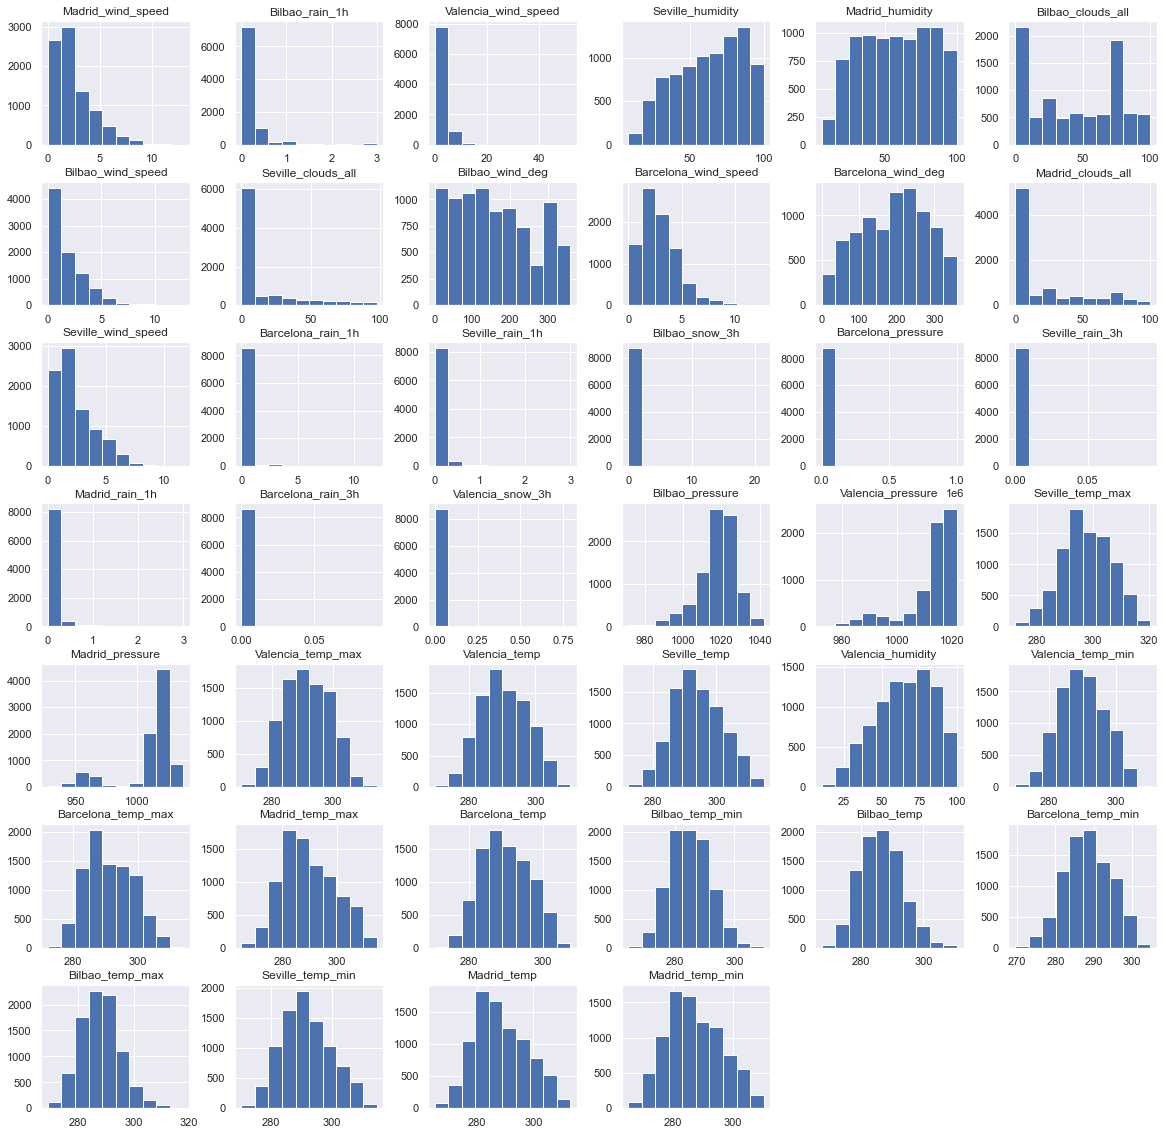

In [18]:
 # create a list of all numerical features
features = ['Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_pressure',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min']
df_train[features].hist(figsize=(20,20));

## Merging dataset to simplify work
​
Before we do the rest of the data preprocessing and data engineering we merge the trainand test datasets to simplify our work 

In [19]:
# merge train and test dataset to make the pre-processing and data engineering easier
df=pd.concat([df_train, df_test])
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,week,weekdays,hour
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015.0,1.0,1.0,3.0,3.0
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015.0,1.0,1.0,3.0,6.0
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015.0,1.0,1.0,3.0,9.0
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015.0,1.0,1.0,3.0,12.0
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015.0,1.0,1.0,3.0,15.0


In [20]:
df.shape

(11683, 54)

#### Our dataset is now bigger - all the data is together, both the test and train data


In [21]:
df.tail(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,week,weekdays,hour
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,sp24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,NaN,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN,NaN,NaN,NaN,NaN,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,sp24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,NaN,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN,NaN,NaN,NaN,NaN,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,14.666667,2.666667,233.333333,0.0,4.666667,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.000000,800.0,NaN,290.816667,1030.000000,293.483333,293.483333,800.000000,290.816667,23.666667,293.483333,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN,NaN,NaN,NaN,NaN,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,19.000000,2.333333,253.333333,0.0,3.333333,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.333333,800.0,NaN,288.816667,1030.333333,286.483333,285.976667,800.000000,288.300000,59.000000,285.483333,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN,NaN,NaN,NaN,NaN,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,120.000000,4.666667,310.000000,0.0,3.666667,0.0,sp23,0.0,0.0,1028.000000,0.0,0.0,0.0,0.0,800.0,800.0,1034.000000,800.0,NaN,284.816667,1030.666667,281.150000,280.313333,800.000000,284.423333,79.000000,279.483333,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN,NaN,NaN,NaN,NaN,NaN


**load_shortfall_3h** has NaN values at the end as expected since the test data doesnt have values for the predictor variable 

## Preprocessing step 

### Dealing with the Object data types 

Pre-processing step: Change the Valencia_wind_deg and Seville_pressure categorical feautures to numerical 

In [22]:
# First strip out the categorical text, ten convert to numeric

#predict_vector = predict_vector.convert_dtypes()

df['Valencia_wind_deg'] = df['Valencia_wind_deg'].map(lambda x: x.lstrip('level_'))
df['Seville_pressure'] = df['Seville_pressure'].map(lambda x: x.lstrip('sp'))

# Then change datatype from object to int "Valencia_wind_deg", "Seville_pressure"

df[["Valencia_wind_deg", "Seville_pressure"]] = df[["Valencia_wind_deg", "Seville_pressure"]].apply(pd.to_numeric)

print('Valencia_wind_deg new daya type: ',df['Valencia_wind_deg'].dtypes)
print('Seville_pressure new daya type: ', df['Seville_pressure'].dtypes)

Valencia_wind_deg new daya type:  int64
Seville_pressure new daya type:  int64


All our features are now numerical except for time

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### Missing Values in Valencia pressure 

Lets look at the distribution of data for the Valencia_pressure feature with missing values 

<AxesSubplot:title={'center':'Boxplot of Valencia Pressure with missing values'}, xlabel='Valencia_pressure'>

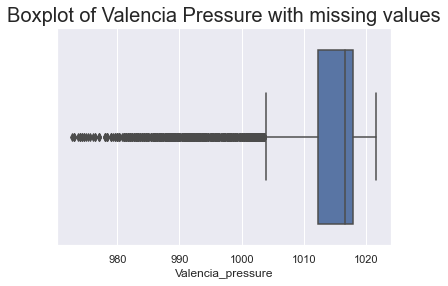

In [94]:
# print a box plot to see what the data looks like in the valencia_pressure column 
plt.title('Boxplot of Valencia Pressure with missing values', fontsize = 20)
sns.set(rc={'figure.figsize':(10,4)})
sns.boxplot(df['Valencia_pressure'])

### Impute missing values 

In [95]:
# imputing values for Valencia_pressure

# look at the median, mode and mean value of valencia_pressure to figure out if it would be a good idea to impute the values 
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

Mode
0    1018.0
dtype: float64
Mean
1013.5670632543047
Median
1016.6666666667


#### Mean, median and mode are not that different so let's use mode

In [96]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,week,weekdays,hour
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1.0,3,3
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1.0,3,6
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1.0,3,9
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1.0,3,12
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1.0,3,15


In [97]:
#make a copy of the dataset before we make anyt changes to it  
df_clean = df
# *Impute Valencia_pressure column with the mode 
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(1018)

In [98]:
# Check to see there is no more missing data from Valencia_pressure
print("Percentage of data missing from Valencia_pressure = " 
      + str(round(df_clean['Valencia_pressure'].isnull().sum() * 100 / len(df_clean),2)), ' %')

Percentage of data missing from Valencia_pressure = 0.0  %


### Populate Time feature for the merged dataset - additional df_test part 

Make sure all the time features are populated. In the EDA we only populated the train data with time features. 

In [99]:
df_clean.drop(['year', 'month',
       'week', 'weekdays', 'hour'], axis = 1)

#get year,month,week,days,hours from time column and convert them to int
df_clean['year'] = pd.DatetimeIndex(df_clean['time']).year
df_clean['month'] = pd.DatetimeIndex(df_clean['time']).month
df_clean['week'] = pd.DatetimeIndex(df_clean['time']).week
df_clean['weekdays'] = pd.DatetimeIndex(df_clean['time']).weekday
df_clean['hour'] = pd.DatetimeIndex(df_clean['time']).hour

#change the datatype to float, useful for regression
df_clean['year']= df_clean['year'].astype('int')
df_clean['month']= df_clean['month'].astype('int')
df_clean['week']= df_clean['week'].astype('float')
df_clean['weekdays']= df_clean['weekdays'].astype('int')
df_clean['hour']= df_clean['hour'].astype('int')

df_clean[['year','month','week','weekdays','hour']].head()

,year,month,week,weekdays,hour
0,2015,1,1.0,3,3
1,2015,1,1.0,3,6
2,2015,1,1.0,3,9
3,2015,1,1.0,3,12
4,2015,1,1.0,3,15


In [100]:
df_clean.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,week,weekdays,hour
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1.0,3,3
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1.0,3,6
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1.0,3,9
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1.0,3,12
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1.0,3,15


Our time feature columns are added on at the end of our merged dataset:year, month, week, weekdays, hour

### Dropping noise

The "Unnamed: 0" column is the same as the index - we drop it together with the time column 

In [101]:
df_clean = df_clean.drop(['Unnamed: 0', 'time'], axis = 1)

In [102]:
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,week,weekdays,hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1.0,3,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1.0,3,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1.0,3,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1.0,3,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1.0,3,15


In [103]:
df_clean.shape

(11683, 52)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *

In [105]:
y = df_clean[:len(df_train)][['load_shortfall_3h']]

x = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
# Ignore for now
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

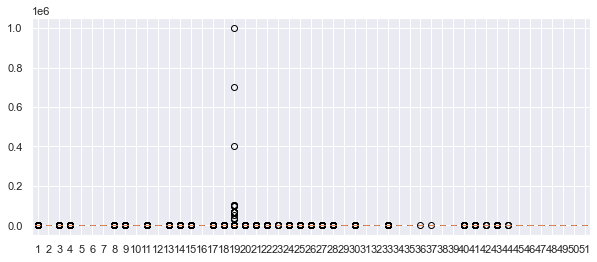

In [106]:
#Before feature scaling
plt.boxplot(x_train)
plt.show()

One of our feautres has massive outliers. so much so that we are hardly able to see the box plots. They are squashed up with the outliers dominating this figure. This will influence the performance of our models also and is a good illustration of why we need to scale our features

In [107]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [108]:
# Model linear regression

lr = LinearRegression()

In [109]:
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2) 

In [110]:
lr.fit(x_train,y_train)

preds = lr.predict(x_test)

In [111]:
# Model evaluation

def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [112]:
print('Linear Model RMSE Score:', rmse(y_test, preds))
from sklearn.metrics import r2_score
print('R2 Score:',r2_score(y_test, preds))

Linear Model RMSE Score: 4763.074656495
R2 Score: 0.19313022649540268


In [113]:
%%time
# Model: Decision Tree Regressor


# create model object
dtr = DecisionTreeRegressor()

# train model
dtr.fit(x_train,y_train)

# Predict model for the test
dt_pred=dtr.predict(x_test)

#Show RMSE score
print('DecisionTreeRegressor RMSE:', sqrt(mean_squared_error(y_test, dt_pred)))
print('R2 Score:',r2_score(y_test, dt_pred))

DecisionTreeRegressor RMSE: 5119.325299336744
R2 Score: 0.0679179959377465
Wall time: 347 ms


In [114]:
%%time

# Model: KNeighborsRegressor


# knn
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

knn_pred=knn.predict(x_test)
knn_pred

#Show RMSE score
print('KNeighborsRegressor RMSE:', sqrt(mean_squared_error(y_test, knn_pred)))
print('R2 Score:',r2_score(y_test, knn_pred))

KNeighborsRegressor RMSE: 5133.768016328684
R2 Score: 0.06265136991946818
Wall time: 467 ms


In [115]:
%%time

# Model: Ridge Regression


#fit the model
ridge = Ridge()
ridge.fit(x_train,y_train)

ridge_pred=ridge.predict(x_test)
ridge_pred

#Show RMSE score
print('Ridge RMSE:', sqrt(mean_squared_error(y_test, ridge_pred)))
print('R2 Score:',r2_score(y_test, ridge_pred))

Ridge RMSE: 4765.834542841598
R2 Score: 0.19219490039050413
Wall time: 24 ms


In [116]:
%%time

# Model: XGBRegressor



#fit the model
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

xgb_pred=xgb.predict(x_test)
xgb_pred

#Show RMSE score
print('XGBRegressor:', sqrt(mean_squared_error(y_test, xgb_pred)))
print('R2 Score:',r2_score(y_test, xgb_pred))

XGBRegressor: 3223.6809977276043
R2 Score: 0.6303992978633732
Wall time: 878 ms


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### We use 5 types of regression models to predict into the future what the 3 hour load shortfall will be 


### Preperation

In [131]:
# We assign our x (feautures) and y (predicted value) to dataframes, and use just the training data portion of our data } 
y = df_clean[:len(df_train)][['load_shortfall_3h']]
x = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)

# Ignore for now
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

# Feature Scaling

Before we begin modelling, we scale the data so that the nature of the values assigned to the variables in a data set become more similar. 

We first look at Standardisation and then Normalisation methods 

To **Standardise** - Subtract mean and divide by standard deviation: Center the data and change the units to standard deviations. For a regression analysis, select this method to standardize predictors in order to reduce multicollinearity and to compare the size of the coefficients on a comparable scale.

**Normalization** is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.




### Standardisation 

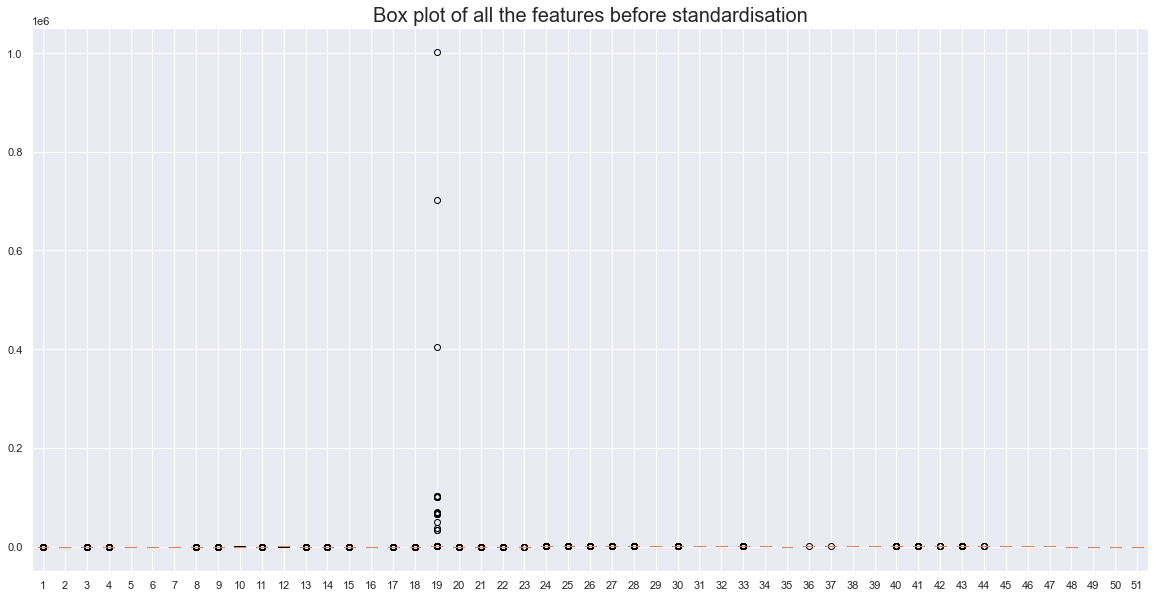

In [132]:
#Before standardisation feature scaling
plt.title('Box plot of all the features before standardisation',fontsize=20)
plt.boxplot(x_train)
plt.gcf().set_size_inches(20, 10)
plt.show()

One of our feautres has massive outliers. so much so that we are hardly able to see the box plots. They are squashed up with the outliers dominating this figure. This will influence the performance of our models also and is a good illustration of why we need to scale our features 

In [133]:
# Scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

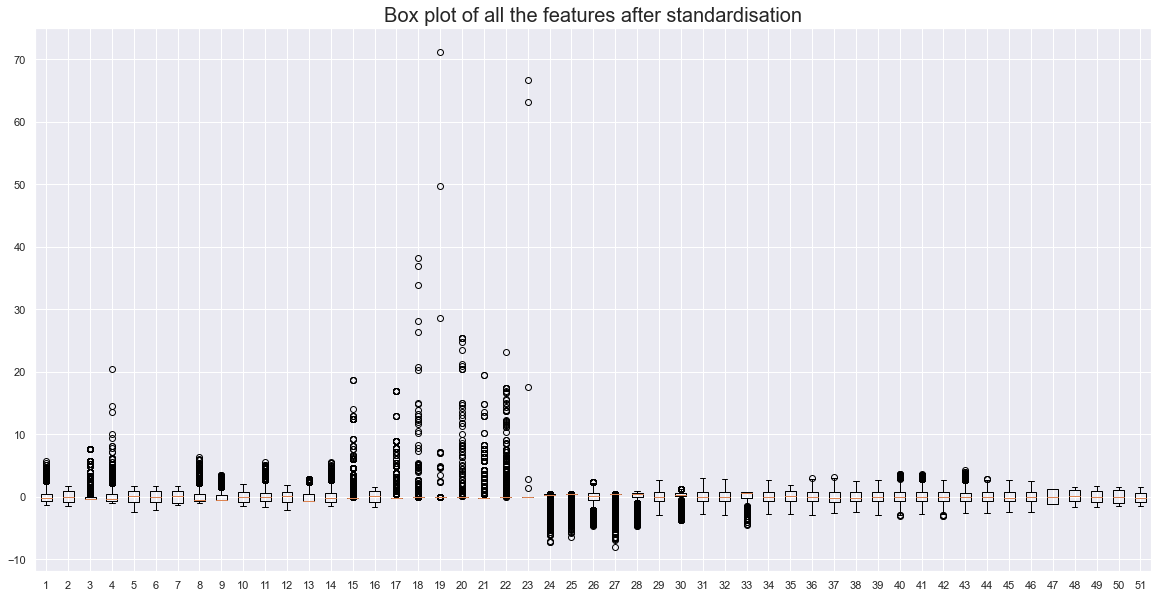

In [134]:
#After Standardisation
plt.title('Box plot of all the features after standardisation',fontsize=20)
plt.boxplot(x_train)
plt.gcf().set_size_inches(20, 10)
plt.show()

 We can see the data is now centered around zero, and while there are still plenty of outliers the box plots are showing up better which means the data in each variable is better scaled in relation to the other variables 

In [135]:
# Use x & y to run the models and test model accuracy 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2) 

## Apply Models

#### Fit x5 different regresion models to the data to test which ones will perform better 

### Model 1: Linear Regression

In [137]:
# we call our model lr and call up the linear modelling function from the sklearn.linear_model library 
lr = LinearRegression()
lr.fit(x_train,y_train)

# we get predicted values from this linear model and save it as preds
preds = lr.predict(x_test)

def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

print('Linear Model RMSE Score:', rmse(y_test, preds))
#from sklearn.metrics import r2_score
print('R2 Score:',r2_score(y_test, preds))

Linear Model RMSE Score: 4527.7553654938165
R2 Score: 0.20197500004071123


### Model 2: Decision Tree Regressor

In [138]:
%%time
# create model object
dtr = DecisionTreeRegressor()

# train model
dtr.fit(x_train,y_train)

# Predict model for the test
dt_pred=dtr.predict(x_test)

#Show RMSE score
print('DecisionTreeRegressor RMSE:', sqrt(mean_squared_error(y_test, dt_pred)))
print('R2 Score:',r2_score(y_test, dt_pred))

DecisionTreeRegressor RMSE: 5191.937889293152
R2 Score: -0.04932390270853948
Wall time: 338 ms


### Model 3: Random Forrest Regressor

In [139]:
%%time
# create model object
rdf = RandomForestRegressor()

# train model
rdf.fit(x_train,y_train)

# Predict model for the test
rdf_pred=rdf.predict(x_test)

#Show RMSE score
print('DecisionTreeRegressor RMSE:', sqrt(mean_squared_error(y_test, rdf_pred)))
print('R2 Score:',r2_score(y_test, rdf_pred))

<timed exec>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


DecisionTreeRegressor RMSE: 3393.553463268351
R2 Score: 0.5517090409587393
Wall time: 16.8 s


### Model 4: KNeighborsRegressor

In [140]:
%%time
# knn
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

knn_pred=knn.predict(x_test)
knn_pred

#Show RMSE score
print('KNeighborsRegressor RMSE:', sqrt(mean_squared_error(y_test, knn_pred)))
print('R2 Score:',r2_score(y_test, knn_pred))

KNeighborsRegressor RMSE: 4919.338259569158
R2 Score: 0.057971674932532524
Wall time: 479 ms


### Model 5: XGBRegressor

In [141]:
%%time
#fit the model
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

xgb_pred=xgb.predict(x_test)
xgb_pred

#Show RMSE score
print('XGBRegressor:', sqrt(mean_squared_error(y_test, xgb_pred)))
print('R2 Score:',r2_score(y_test, xgb_pred))

XGBRegressor: 3160.793370129233
R2 Score: 0.6110956503384305
Wall time: 896 ms


## 6. Model Performance -Standardisation 

In [143]:
#comparing the RMSE of each fitted model
RMSE_dict = {"RMSE, R2":
             {
            "Linear Regression": [sqrt(mean_squared_error(y_test, preds)),r2_score(y_test, preds)],
            "XGBRegressor": [sqrt(mean_squared_error(y_test, xgb_pred)),r2_score(y_test, xgb_pred)],
            "KNeighborsRegressor": [sqrt(mean_squared_error(y_test, knn_pred)),r2_score(y_test, knn_pred)],
            "Decision Tree": [sqrt(mean_squared_error(y_test, dt_pred)),r2_score(y_test, dt_pred)],
                 "Random Forest Regressor": [sqrt(mean_squared_error(y_test, rdf_pred)), r2_score(y_test, rdf_pred)]
             }
             
             }

# create dataframe from dictionary
RMSE_df = pd.DataFrame(data=RMSE_dict)

#RMSE_df.apply(lambda x: ['RMSE', 'R2'], axis=1, result_type='expand')
RMSE_df

,"RMSE, R2"
Decision Tree,"[5191.937889293152, -0.04932390270853948]"
KNeighborsRegressor,"[4919.338259569158, 0.057971674932532524]"
Linear Regression,"[4527.7553654938165, 0.20197500004071123]"
Random Forest Regressor,"[3393.553463268351, 0.5517090409587393]"
XGBRegressor,"[3160.793370129233, 0.6110956503384305]"


**RMSE:** Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

Our lowest RMSE score is the XGBRegressor model, But it also has the hisghest R2. 

Coefficient of determination **R2:** R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

### Hyperparameter tuning for XGBRegressor 
We use GridSearchCV as opposed to the RandomizedSearchCV to optimise parameters 

In [144]:
%%time
xgb = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07,0.5],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4,40],
              'seed': [1,0],
              'n_estimators': [500, 200,1]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[12:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
0.5694978803568522
{'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'seed': 1}
Wall time: 3min 22s


#### Optimised Parameters from the GridSearch are programmed in

In [145]:
#Using the new parameters
xgb=XGBRegressor(learning_rate= 0.07, max_depth= 6, 
                 min_child_weight= 4, n_estimators= 500, 
                 nthread= 4, seed= 1) 

In [146]:
%%time
#Fitting and training the tuned model
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
xgb_pred
print('Testing RMSE for XGBRegressor')
print('XGBRegressor:', sqrt(mean_squared_error(y_test, xgb_pred)))

Testing RMSE for XGBRegressor
XGBRegressor: 2980.655110215282
Wall time: 6.5 s


#### Our XBGRegression model performed slightly better after the tuning 

### Using the top best features - XGB Regressor (after standardisation) 

### Importance of Feature Selection:
* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Might Improve Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

In [147]:
#Using the top best features 
from sklearn.feature_selection import SelectKBest
# The features selected that best predict purchase price
selector = SelectKBest( k=5)
fit = selector.fit(x,y)
X_best = selector.fit_transform(x,y)
#X_best = selector.transform(X)

#Created dataframes showing top columns and their scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Feature','Score']  

#print 5 best features
Top_features= featureScores.nlargest(5,'Score')  
Top_features

C:\Users\lehut\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\lehut\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\lehut\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\lehut\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,Feature,Score
22,Valencia_snow_3h,inf
18,Barcelona_pressure,25.521038
17,Bilbao_snow_3h,2.880573
2,Bilbao_rain_1h,1.631954
16,Seville_rain_1h,1.486721


Valencia snow has a lot of outliers, and gives a score of infinity

In [148]:
X_best.shape

(8763, 5)

In [149]:
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.2, random_state=50)

In [150]:
# Feature Scaling  
X_train_best = sc.fit_transform(X_train_best)
X_test_best = sc.transform(X_test_best)

In [151]:
xgb=XGBRegressor(learning_rate= 0.07, max_depth= 5, 
                 min_child_weight= 4, n_estimators= 500, 
                 nthread= 4, seed= 1) 

In [152]:
%%time
xgb.fit(X_train_best,y_train_best)
xgb_pred=xgb.predict(X_test_best)
xgb_pred
print('Testing RMSE for XGBRegressor')
print('XGBRegressor:', sqrt(mean_squared_error(y_test_best, xgb_pred)))

Testing RMSE for XGBRegressor
XGBRegressor: 5227.045455646695
Wall time: 1.06 s


### Feature Scaling - Normalisation 

In [153]:
# We re- assign our x (feautures) and y (predicted value) to dataframes, and use just the training data portion of our data } 
y = df_clean[:len(df_train)][['load_shortfall_3h']]
x = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)

# Ignore for now
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

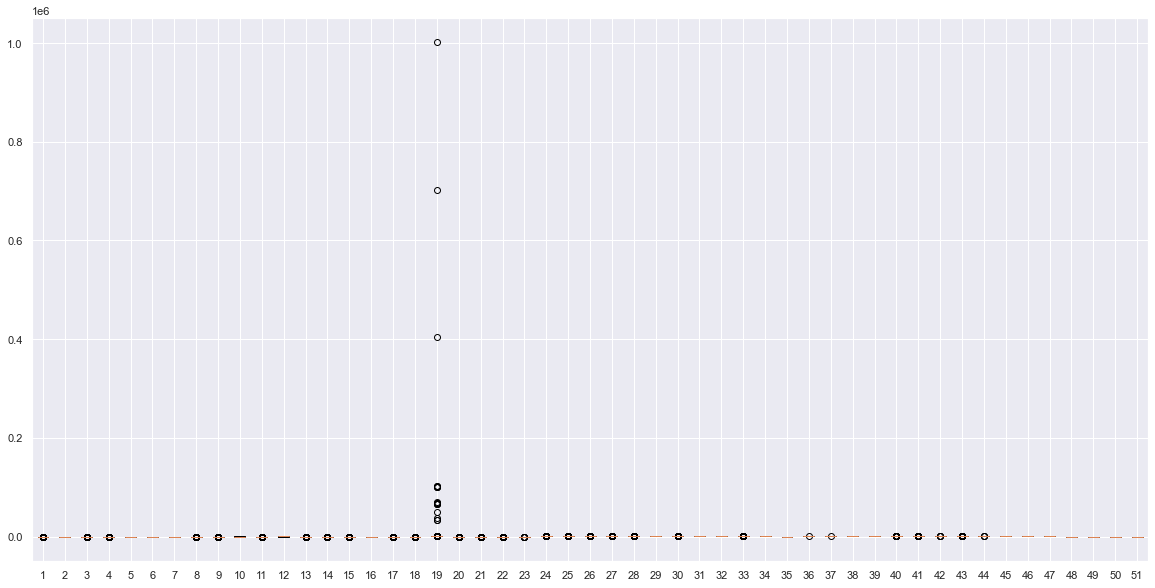

In [154]:
#Before normalisation - sanity check to see if we have the correct data again to start off with 
plt.boxplot(x_train)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [155]:
# Scaling the data
scaler = MinMaxScaler()

#df_norm = pd.DataFrame(scaler.fit_transform(df_cars), columns=df_cars.columns)


x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

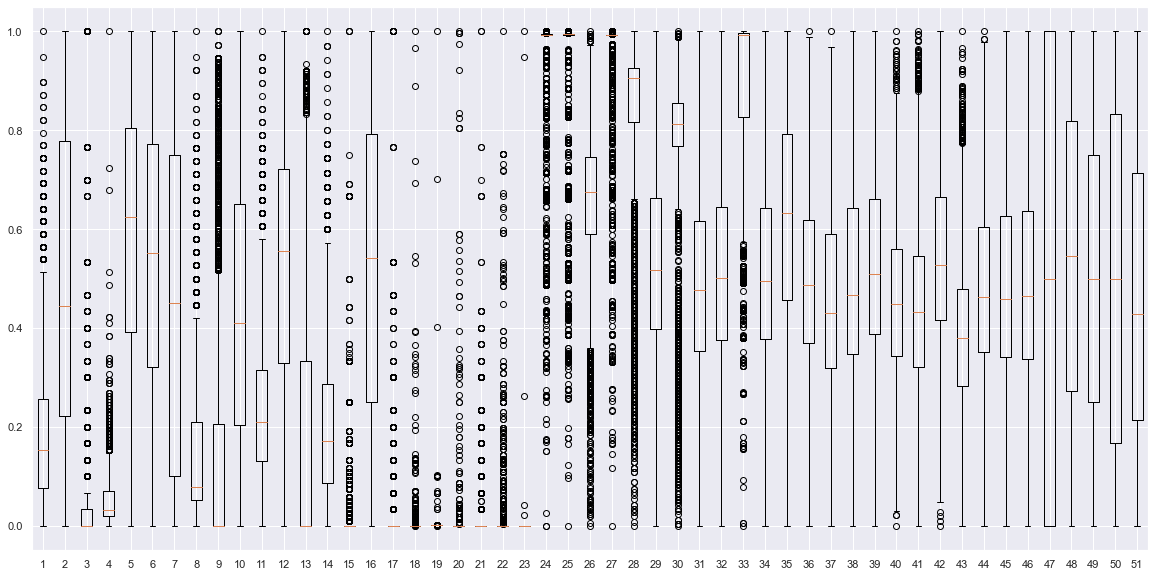

In [156]:
#After Normalisation 
plt.boxplot(x_train)
plt.gcf().set_size_inches(20, 10)
plt.show()

All the data for each feature now lies between 0 and 1 

In [157]:
# Use x & y to run the models and test model accuracy 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

### Linear Reggression

In [158]:
# we call our model lr and call up the linear modelling function from the sklearn.linear_model library 
lr = LinearRegression()
lr.fit(x_train,y_train)

# we get predicted values from this linear model and save it as preds
preds = lr.predict(x_test)

def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

print('Linear Model RMSE Score:', rmse(y_test, preds))
#from sklearn.metrics import r2_score
print('R2 Score:',r2_score(y_test, preds))

Linear Model RMSE Score: 4669.678586370125
R2 Score: 0.18510286604922666


### Decision Tree

In [159]:
%%time
# create model object
dtr = DecisionTreeRegressor()

# train model
dtr.fit(x_train,y_train)

# Predict model for the test
dt_pred=dtr.predict(x_test)

#Show RMSE score
print('DecisionTreeRegressor RMSE:', sqrt(mean_squared_error(y_test, dt_pred)))
print('R2 Score:',r2_score(y_test, dt_pred))

DecisionTreeRegressor RMSE: 5070.947346930876
R2 Score: 0.03903622976847554
Wall time: 354 ms


### Random Forest

In [160]:
%%time
# create model object
rdf = RandomForestRegressor()

# train model
rdf.fit(x_train,y_train)

# Predict model for the test
rdf_pred=rdf.predict(x_test)

#Show RMSE score
print('DecisionTreeRegressor RMSE:', sqrt(mean_squared_error(y_test, rdf_pred)))
print('R2 Score:',r2_score(y_test, rdf_pred))

<timed exec>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


DecisionTreeRegressor RMSE: 3471.042827068038
R2 Score: 0.5497551473886501
Wall time: 16.9 s


### KNeighborsRegressor

In [161]:
%%time
# knn
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

knn_pred=knn.predict(x_test)
knn_pred

#Show RMSE score
print('KNeighborsRegressor RMSE:', sqrt(mean_squared_error(y_test, knn_pred)))
print('R2 Score:',r2_score(y_test, knn_pred))

KNeighborsRegressor RMSE: 4974.67620437742
R2 Score: 0.07517736895314242
Wall time: 464 ms


### XGBRegressor

In [162]:
%%time
#fit the model
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

xgb_pred=xgb.predict(x_test)


#Show RMSE score
print('XGBRegressor:', sqrt(mean_squared_error(y_test, xgb_pred)))
print('R2 Score:',r2_score(y_test, xgb_pred))

XGBRegressor: 3202.1992819029147
R2 Score: 0.6167999794648833
Wall time: 885 ms


## 6. Model Performance - Normalisation 

In [163]:
#comparing the RMSE of each fitted model
RMSE_dict = {"RMSE, R2":
             {
            "Linear Regression": [sqrt(mean_squared_error(y_test, preds)),r2_score(y_test, preds)],
            "XGBRegressor": [sqrt(mean_squared_error(y_test, xgb_pred)),r2_score(y_test, xgb_pred)],
            "KNeighborsRegressor": [sqrt(mean_squared_error(y_test, knn_pred)),r2_score(y_test, knn_pred)],
            "Decision Tree": [sqrt(mean_squared_error(y_test, dt_pred)),r2_score(y_test, dt_pred)],
                 "Random Forest Regressor": [sqrt(mean_squared_error(y_test, rdf_pred)), r2_score(y_test, rdf_pred)]
             }
             
             }

# create dataframe from dictionary
RMSE_df = pd.DataFrame(data=RMSE_dict)

#RMSE_df.apply(lambda x: ['RMSE', 'R2'], axis=1, result_type='expand')
RMSE_df

,"RMSE, R2"
Decision Tree,"[5070.947346930876, 0.03903622976847554]"
KNeighborsRegressor,"[4974.67620437742, 0.07517736895314242]"
Linear Regression,"[4669.678586370125, 0.18510286604922666]"
Random Forest Regressor,"[3471.042827068038, 0.5497551473886501]"
XGBRegressor,"[3202.1992819029147, 0.6167999794648833]"


## Kaggle Submission Code

In [164]:
output = pd.DataFrame({"time":df_test['time']})
submission = output.join(daf)        
submission.to_csv("GM2_submission.csv", index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic